<a href="https://colab.research.google.com/github/BHariKrishnaReddy/DataScience-Challeges/blob/master/cardhekoKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Ka
> [Kaggle Cardheko dataset](https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho)

##### Formalities !

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split

In [67]:
df = pd.read_csv("/content/car data.csv")

In [68]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Selling price is dependent features

In [69]:
df.shape

(301, 9)

In [70]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [71]:
cols = df[['Year','Fuel_Type','Seller_Type','Transmission','Owner']]
for i in cols:
  print(i," has these unique values ",df[i].unique(),"\n")

Year  has these unique values  [2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007] 

Fuel_Type  has these unique values  ['Petrol' 'Diesel' 'CNG'] 

Seller_Type  has these unique values  ['Dealer' 'Individual'] 

Transmission  has these unique values  ['Manual' 'Automatic'] 

Owner  has these unique values  [0 1 3] 



##### Null values

In [72]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

There no Null values cool !

##### Preparation of Final Dataset

In [73]:
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [74]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [75]:
final_dataset['number_of_years'] = 2022 -  final_dataset['Year']

In [76]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,number_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


From we came to know about how old a car age is now by removing the Year column would effet us 

In [77]:
final_dataset = final_dataset[['Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'number_of_years']]

In [78]:
final_dataset.dtypes

Selling_Price      float64
Present_Price      float64
Kms_Driven           int64
Fuel_Type           object
Seller_Type         object
Transmission        object
Owner                int64
number_of_years      int64
dtype: object

Fuel_Type,Seller_Type,Transmission can be converted to numeric so machine can understand by using `OneHot or LabelEncoding` or we can use `get_dummies` with drop_first = True to prevent it for **Dummy variable Trap**

In [79]:
final_dataset = pd.get_dummies(final_dataset,drop_first=True)

In [80]:
print(final_dataset.shape)
final_dataset.head()

(301, 9)


,Selling_Price,Present_Price,Kms_Driven,Owner,number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


there was change in number of features

In [81]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
number_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


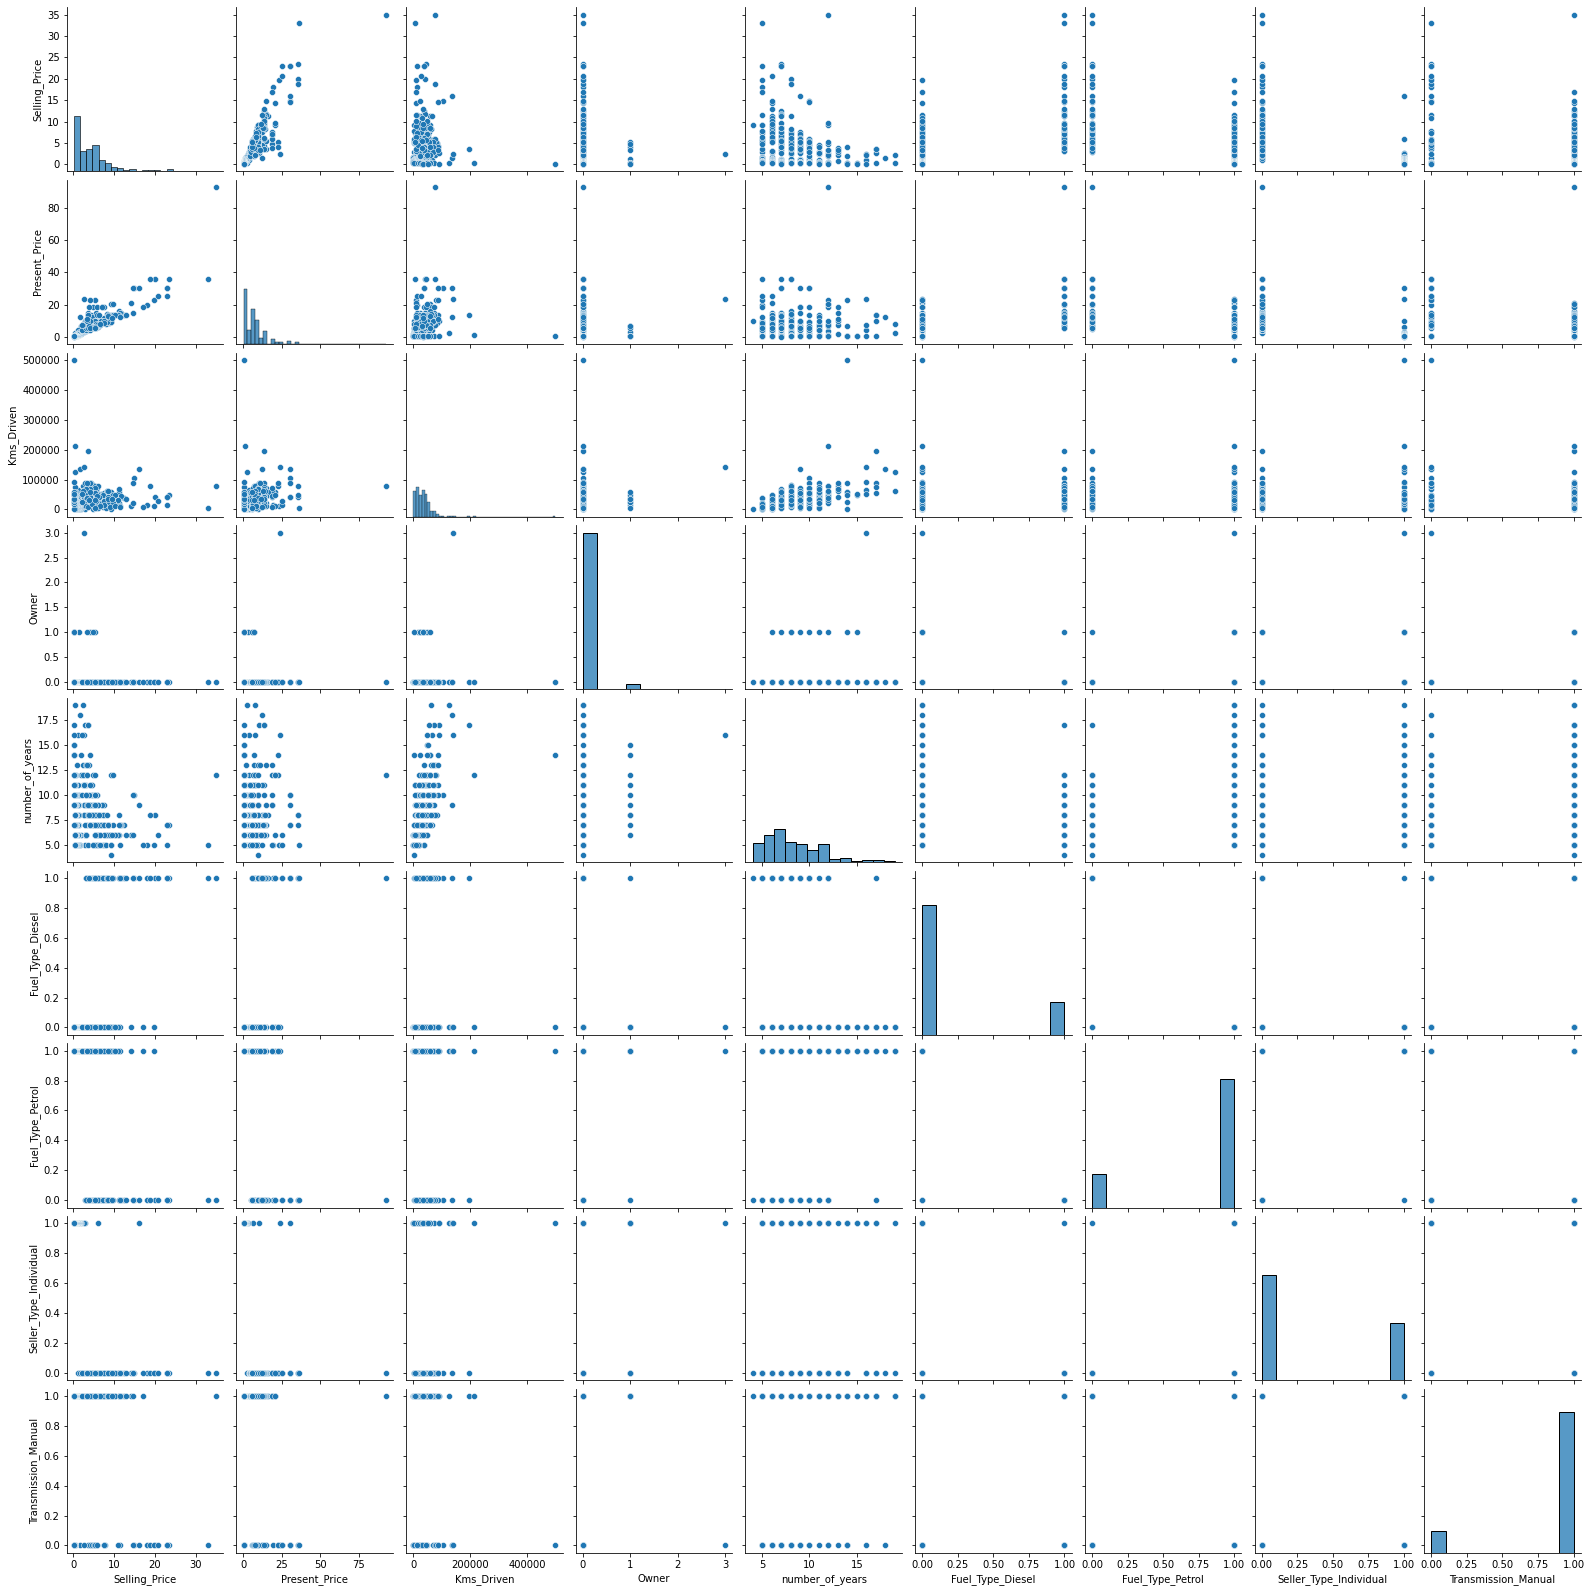

In [82]:
sns.pairplot(final_dataset)

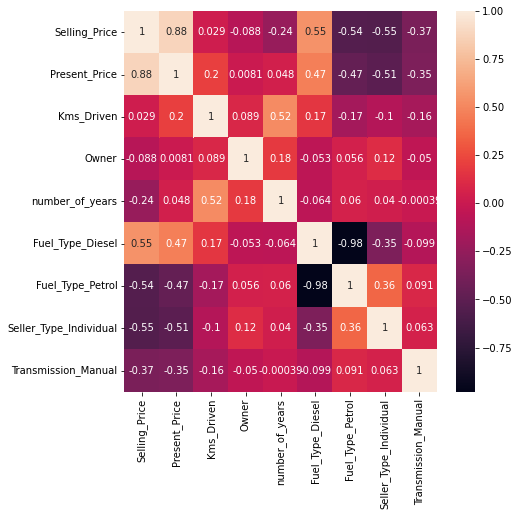

In [83]:
#Pearson Corelation
corelation_matrix = final_dataset.corr()
cor_features = corelation_matrix.index
plt.figure(figsize=(7,7))
mapplot = sns.heatmap(final_dataset[cor_features].corr(),annot=True )

##### Model building

In [84]:
#independent and dependent featues
X = final_dataset.iloc[:,1:] #droping selling_price
y = final_dataset.iloc[:,0]

In [85]:
#Take only important features
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [86]:
 print(model.feature_importances_)

[4.11136557e-01 4.12511125e-02 3.63426186e-04 7.74453823e-02
 2.11016355e-01 1.38110564e-02 1.31279674e-01 1.13696436e-01]


 for better understanding we will plot it for to 5 features

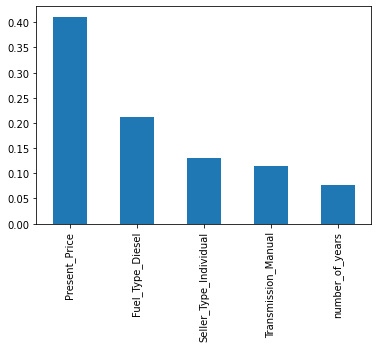

In [87]:
f = pd.Series(model.feature_importances_,index = X.columns)
f.nlargest(5).plot(kind='bar')
plt.show()

In [88]:
 X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [89]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

###### Setting Hyperparameters

In [90]:
#number of trees
n_estimators = [int(i) for i in np.linspace(start=100,stop=1200,num=12)]

#features consider at very split
max_features = ['auto','sqrt']

#levels in tree 
max_depth = [int(i) for i in np.linspace(5,30,num=6)]

#minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

#minimum number of samples required to split a node
min_samples_leaf = [1,2,5,10]

###### RandomizedSearchCV

In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf
}
random_grid

{'max_depth': [5, 10, 15, 20, 25, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 10, 15, 100],
 'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200]}

In [93]:
 rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter= 10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [94]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

###### Prediction

In [95]:
prediction = rf_random.predict(X_test) 

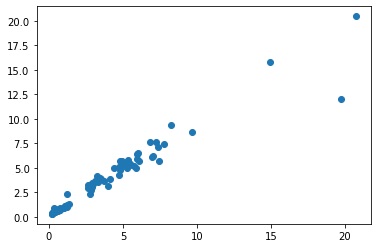

In [97]:
  plt.scatter(y_test,prediction)

##### Pickle

In [99]:
import pickle
file = open("randomForestReg_cardheko.pkl","wb")

#dump info to file
pickle.dump(rf_random,file)